In [38]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import os
from tqdm import tqdm
import time
import numpy as np
import torch.utils.data as data
from skimage import io, transform, img_as_float
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
from skimage import io, transform, img_as_float

In [2]:
delta = 0.3
d_x = 0
real_n = 0

LoL = []
XoX = []
for s in range(20):
    image_name = "dark_color.jpg"
    image = io.imread(image_name)
    image = transform.resize(image, (16*(1+s), 16*(1+s)))
    size = np.shape(image)
    zeross = np.zeros(size)
    n = int(0.05*np.size(image))
    ctr = 0
    a = list()
    b = list()
    start = time.time()
    while(ctr<n):
        i = 0
        while (i < size[0]):
            j = 0
            while j < size[1]:
                k = 0
                while k < size[2]:
                    attempt = 0
                    if(zeross[i,j,k]==0):
                        while(attempt<10):
                            r1 = np.random.randint(0,size[0])
                            r2 = np.random.randint(0,size[1])
                            r3 = np.random.randint(0,size[2])
                            if(zeross[r1,r2,r3]==0 and (r1,r2,r3)!=(i,j,k)):
                                x = abs(image[r1,r2,r3]-image[i,j,k])
                                if(x<=d_x):
                                    real_n = real_n +1
                                    #suppose here that they are equal
                                    zeross[i,j,k]=1
                                    b.append([i,j,k])
                                    image[i,j,k]-=delta
                                    a.append([r1,r2,r3])
                                    image[r1,r2,r3]+=delta
                                    zeross[r1,r2,r3]=1
                                attempt=11
                            else:
                                attempt+=1
                    if(real_n>=n):
                        break
                    k+=1
                if(real_n>=n):
                    break
                j+=1
            if(real_n>=n):
                break
            i+=1
        ctr+=1 
    finish = time.time()
    time_spent = finish - start
    LoL.append(time_spent)
    XoX.append((s+1)*16)
print("done")

done


In [78]:
xx = []

In [91]:
xx.append(LoL)

In [92]:
x = np.ones((20,))

In [93]:
for i in range(len(xx)):
    x+=np.array(xx[i])
x = x/len(xx)

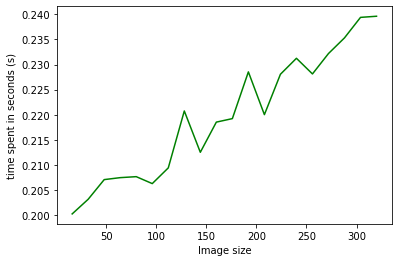

In [94]:
plt.xlabel('Image size')
plt.ylabel('time spent in seconds (s)')
plt.plot(XoX,x,'g')
plt.show()

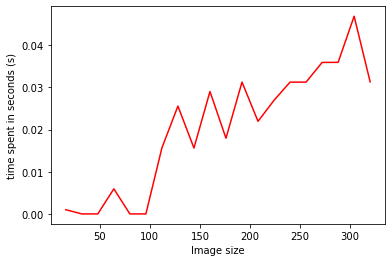

In [77]:
plt.xlabel('Image size')
plt.ylabel('time spent in seconds (s)')
plt.plot(XoX,LoL,'r')
plt.show()